In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
from nltk import bigrams
import itertools

In [2]:
# Read your CSV file
df = pd.read_csv('../data/phone_ratings_cleaned.csv')
df.head()

,product_id,comment,rating,source_file,word_count
0,honor-x8b,đừng mua không có linh kiện,1,ratings\honor-x8b.csv,6
1,honor-x8b,máy sao cũng được ghét nhất cái zalo vui nó bá...,3,ratings\honor-x8b.csv,29
2,honor-x8b,chiếc điện thoại mỏng nhất tôi từng dùng cũng ...,5,ratings\honor-x8b.csv,23
3,honor-x8b,sao hôm tôi mua lại không được tặng tai nghe n...,4,ratings\honor-x8b.csv,24
4,honor-x8b,em mua được tuần trả lại mất bao nhiêu ạ,3,ratings\honor-x8b.csv,10


# 1. One Hot Encoding

In [3]:
comments = df['comment'].astype(str).tolist()

In [5]:
comment_one_hot_encoding = comments

In [6]:

vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(comment_one_hot_encoding)

In [7]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2313, 3316))

In [8]:
vectorizer.get_feature_names_out()

array(['0g01', '1000lan', '100gb', ..., 'ứng', 'ứngchán', 'ứngkhởi'],
      shape=(3316,), dtype=object)

In [ ]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comment_one_hot_encoding)
df

# 2. Count Vectorizing

In [11]:
comments_count_vectorizer = comments
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments_count_vectorizer)

In [12]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2313, 3316))

In [ ]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comments_count_vectorizer)
df

# 3.N-grams

In [12]:
comments_n_grams = comments
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(comments_n_grams)

In [13]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2313, 24141))

In [ ]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=comments_n_grams)
df

# 4.Co-occurrence Matrix

In [15]:
def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_to_index = { word:i for i, word in enumerate(vocab) }
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
    # return the matrix and the index
    return co_occurrence_matrix,vocab_to_index

In [ ]:
comments_occurence_matrix = comments


In [ ]:
sentences = [['Mary', 'is','not', 'fat'],
             ['Mary','is', 'not', 'thin']]
merged = list(itertools.chain.from_iterable(sentences))
matrix, vocab_to_index = co_occurrence_matrix(merged)
matrix

matrix([[0., 0., 0., 0., 1.],
        [0., 0., 0., 2., 0.],
        [0., 1., 0., 0., 0.],
        [2., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [ ]:
CoMatrixFinal = pd.DataFrame(matrix, index=vocab_to_index, columns=vocab_to_index)
print(CoMatrixFinal)

      Mary  not  thin   is  fat
Mary   0.0  0.0   0.0  0.0  1.0
not    0.0  0.0   0.0  2.0  0.0
thin   0.0  1.0   0.0  0.0  0.0
is     2.0  0.0   0.0  0.0  0.0
fat    0.0  1.0   0.0  0.0  0.0


In [ ]:
sentences = ['Mary', 'is','not', 'fat', 'Mary','is', 'not', 'thin']
corpus_example = ["this", "is", "a", "simple", "example", "sentence", "for", "testing", "co-occurrence", "matrix"]
co_matrix, vocab_index = co_occurrence_matrix(sentences)
print("Co-occurrence matrix:")
print(co_matrix)

print("\nVocabulary index:")
print(vocab_index)

Co-occurrence matrix:
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 2. 0.]
 [0. 1. 0. 0. 0.]
 [2. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]

Vocabulary index:
{'Mary': 0, 'not': 1, 'thin': 2, 'is': 3, 'fat': 4}


#5 Hash Vectorizing

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
    ' I love you'
]
vectorizer = HashingVectorizer(n_features=5)
X = vectorizer.fit_transform(corpus)

print(X.toarray())

[[ 0.         -0.57735027  0.57735027 -0.57735027  0.        ]
 [ 0.70710678  0.          0.         -0.70710678  0.        ]
 [-0.35355339  0.35355339  0.70710678 -0.35355339 -0.35355339]
 [ 0.         -0.57735027  0.57735027 -0.57735027  0.        ]
 [ 0.         -0.70710678  0.          0.70710678  0.        ]]


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)


In [ ]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=corpus)
df

,and,document,first,is,one,second,the,third,this
This is the first document.,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
This document is the second document.,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
And this is the third one.,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
Is this the first document?,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


# Word2Vec

# Skip-Gram

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [ ]:
sentences = [['I', 'love', 'nlp'],
              ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
              ['nlp', 'is', 'future'],
              [ 'nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
              ['nlp', 'uses', 'machine', 'learning']]
# training the model
# sg = 1, skipgarm, sg = 0, cbow
skipgram = Word2Vec(sentences,vector_size=50, window= 3, min_count=1, sg= 1)

In [ ]:
print(skipgram)

Word2Vec<vocab=21, vector_size=50, alpha=0.025>


In [ ]:
# access vector for one word
skipgram.wv['nlp']

array([-1.0724545e-03,  4.7286271e-04,  1.0206699e-02,  1.8018546e-02,
       -1.8605899e-02, -1.4233618e-02,  1.2917745e-02,  1.7945977e-02,
       -1.0030856e-02, -7.5267432e-03,  1.4761009e-02, -3.0669428e-03,
       -9.0732267e-03,  1.3108104e-02, -9.7203208e-03, -3.6320353e-03,
        5.7531595e-03,  1.9837476e-03, -1.6570430e-02, -1.8897636e-02,
        1.4623532e-02,  1.0140524e-02,  1.3515387e-02,  1.5257311e-03,
        1.2701781e-02, -6.8107317e-03, -1.8928028e-03,  1.1537147e-02,
       -1.5043275e-02, -7.8722071e-03, -1.5023164e-02, -1.8600845e-03,
        1.9076237e-02, -1.4638334e-02, -4.6675373e-03, -3.8754821e-03,
        1.6154874e-02, -1.1861792e-02,  9.0324880e-05, -9.5074680e-03,
       -1.9207101e-02,  1.0014586e-02, -1.7519170e-02, -8.7836506e-03,
       -7.0199967e-05, -5.9236289e-04, -1.5322480e-02,  1.9229487e-02,
        9.9641159e-03,  1.8466286e-02], dtype=float32)

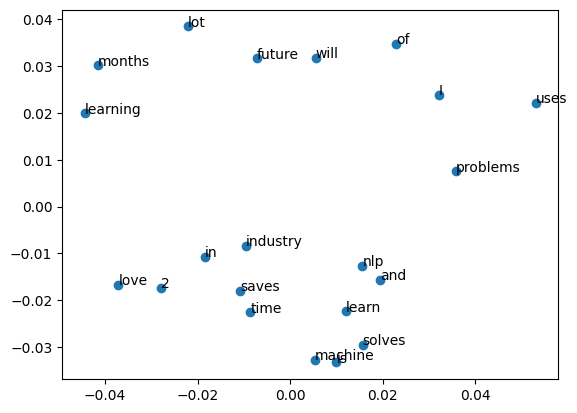

In [ ]:
# save model
skipgram.save('skipgram.bin')
# load model
skipgram = Word2Vec.load('skipgram.bin')
# T -SNE plot í one of the way to evaluate word embedding
X = skipgram.wv[skipgram.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:,0], result[:,1])
words = list(skipgram.wv.index_to_key)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Continuos Bag of Word ( CBOW )

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [ ]:
sentences = [['I', 'love', 'nlp'],
              ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
              ['nlp', 'is', 'future'],
              [ 'nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
              ['nlp', 'uses', 'machine', 'learning']]
# training the model
cbow = Word2Vec(sentences,vector_size=50, window= 3, min_count=1, sg= 0)
print(cbow)

Word2Vec<vocab=21, vector_size=50, alpha=0.025>


In [ ]:
cbow.wv['nlp']

array([-1.0724545e-03,  4.7286271e-04,  1.0206699e-02,  1.8018546e-02,
       -1.8605899e-02, -1.4233618e-02,  1.2917745e-02,  1.7945977e-02,
       -1.0030856e-02, -7.5267432e-03,  1.4761009e-02, -3.0669428e-03,
       -9.0732267e-03,  1.3108104e-02, -9.7203208e-03, -3.6320353e-03,
        5.7531595e-03,  1.9837476e-03, -1.6570430e-02, -1.8897636e-02,
        1.4623532e-02,  1.0140524e-02,  1.3515387e-02,  1.5257311e-03,
        1.2701781e-02, -6.8107317e-03, -1.8928028e-03,  1.1537147e-02,
       -1.5043275e-02, -7.8722071e-03, -1.5023164e-02, -1.8600845e-03,
        1.9076237e-02, -1.4638334e-02, -4.6675373e-03, -3.8754821e-03,
        1.6154874e-02, -1.1861792e-02,  9.0324880e-05, -9.5074680e-03,
       -1.9207101e-02,  1.0014586e-02, -1.7519170e-02, -8.7836506e-03,
       -7.0199967e-05, -5.9236289e-04, -1.5322480e-02,  1.9229487e-02,
        9.9641159e-03,  1.8466286e-02], dtype=float32)

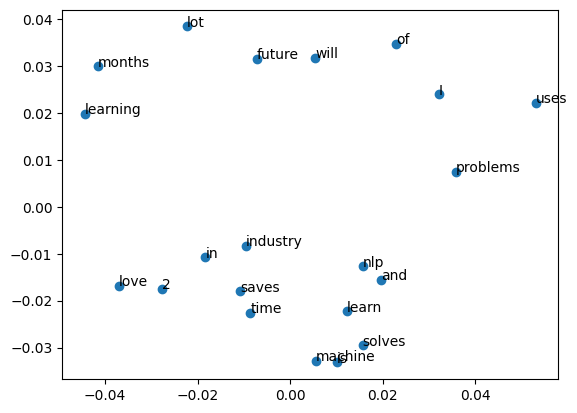

In [ ]:
# save model
cbow.save('cbow.bin')
# load model
cbow = Word2Vec.load('cbow.bin')
# T-SNE plot - to evaluate word embedding
X = cbow.wv[cbow.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:,0], result[:,1])
words = list(cbow.wv.index_to_key)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Use Google's pre-trained model

In [ ]:
%cd /content/drive/MyDrive/Lecture_CNTT_2020/2022_NLP/2024_NLP/Bai 3 - code

/content/drive/.shortcut-targets-by-id/1l_qHY45j2wnx1UYbcozNnJ49EgK0a2-p/2022_NLP/2024_NLP/Bai 3 - code


In [ ]:
import gensim
from gensim.models import KeyedVectors

google_path = "/content/drive/MyDrive/Lecture_CNTT_2020/2022_NLP/2024_NLP/Bai 3 - code/GoogleNews-vectors-negative300.bin"

# Load the Word2Vec model
model = KeyedVectors.load_word2vec_format(google_path, binary=True)

In [ ]:
model.similarity("this","this")

1.0

# Implementing fastText
- Framework của Facebook
- Hiểu về ngữ cảnh

In [ ]:
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

# List of sentences for training
sentences = [['I', 'love', 'nlp'],
              ['I', 'will', 'learn', 'nlp', 'in', '2', 'months'],
              ['nlp', 'is', 'future'],
              ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
              ['nlp', 'uses', 'machine', 'learning']]

# Training the FastText model
fast = FastText(sentences, window=1, min_count=1, workers=5, min_n=1, max_n=2)


In [ ]:
print(fast.wv['nlp'])

[-3.5651671e-03  9.3698065e-04 -2.0309705e-03  1.3372294e-03
  1.0669909e-03 -1.3030644e-03  4.5768594e-04 -3.4850935e-04
  3.0172872e-04 -3.3416669e-04  2.3032913e-03 -2.1352421e-03
 -3.5649028e-03 -2.0423550e-03  1.6025617e-04  3.4330557e-03
  1.6206586e-04 -1.7705902e-03  2.4007181e-04 -2.9109141e-03
  4.3194192e-03 -2.1401787e-04  9.1965008e-04 -1.9673463e-03
  4.2877963e-04  1.9754227e-03 -5.5509841e-04 -7.4600609e-04
 -1.6250368e-04  4.6096946e-04 -4.1272063e-03 -3.7344757e-03
  7.8168191e-04  6.3480536e-04 -2.7865777e-03  1.0397271e-03
  7.2312576e-04  4.0080363e-04 -1.0363614e-03  6.7208544e-04
  5.9388904e-04  1.4350816e-03 -9.1749663e-04  1.1620179e-03
 -4.6320874e-03 -7.4696593e-04 -1.8302952e-03 -1.8878000e-04
  5.4830208e-04 -1.0331636e-03 -9.7611046e-04 -6.6045811e-04
 -1.0406146e-03  4.3693674e-03  3.6964498e-03 -2.3840894e-03
  1.0004241e-03  1.6795534e-04 -4.5526810e-03  8.8466250e-04
  2.2786174e-03 -1.2467529e-04 -2.6847786e-04  2.6513743e-03
 -1.5358579e-03 -4.61347

In [ ]:
print(fast.wv['deep'])

[ 1.1898893e-03  2.0222412e-04  4.9637095e-04 -4.5247972e-03
  5.0031475e-04 -5.7669147e-04  2.3215138e-03  1.8122755e-03
  3.1329440e-03 -3.2382843e-03 -2.0735867e-03  4.5096886e-04
 -5.0894413e-03 -1.4132868e-03  6.0798792e-04  1.1505797e-04
 -1.3437817e-03 -1.5600119e-05  7.7817625e-05 -2.0015505e-03
  2.1665702e-03 -1.5271192e-03 -1.7611531e-03  2.4511227e-03
 -1.2328672e-04 -1.0748897e-03  5.1015976e-04 -4.9623149e-03
 -4.5506412e-04 -1.6293684e-03  1.8716032e-03  3.3969739e-03
 -2.5192171e-04 -4.2594344e-04  2.3148426e-04  4.7881954e-04
  4.5890527e-04  4.0582393e-04  5.1077578e-04  7.6365075e-04
 -1.9895604e-03  2.9070941e-03  2.0714884e-03  1.9922527e-03
 -4.5773468e-06 -1.3224452e-03 -2.7858079e-04 -1.9102786e-03
 -1.1565250e-03 -8.5913646e-04 -4.4928811e-04  7.0329756e-05
  3.4386993e-03  2.0342034e-03  3.1499807e-03  1.9645072e-03
 -3.4178481e-03  3.8640487e-03 -8.0382149e-04  3.1117785e-03
  3.1312630e-03 -3.3222052e-04  4.4351565e-03  2.8062176e-03
 -2.8257309e-03  3.10683

In [ ]:
# save model
fast.save('fast.bin')
# load model
fast = Word2Vec.load('fast.bin')

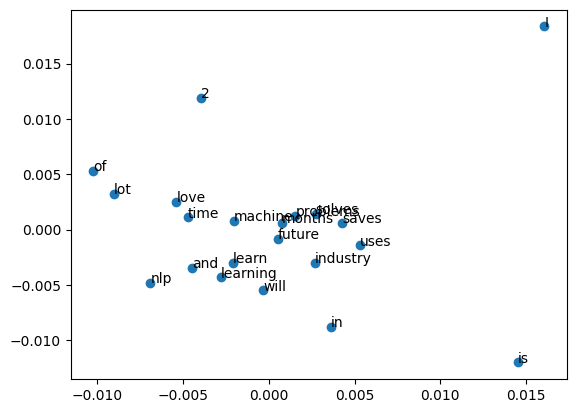

In [ ]:
# T-SNE plot - to evaluate word embedding
X = np.array([fast.get_embedding(word) for word in fast.wv.key_to_index])
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:,0], result[:,1])
words = list(fast.wv.key_to_index)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()
X = fast.wv[fast.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:,0], result[:,1])
words = list(fast.wv.index_to_key)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import pandas as pd
file_path ="/content/drive/MyDrive/Lecture_CNTT_2020/2022_NLP/2024_NLP/Bai 3 - code/hotel_name_preprocessing.csv"
df = pd.read_csv(file_path)
df['raw_name'] = df['raw_name'].apply(simple_preprocess)
model = Word2Vec(df['raw_name'], vector_size=100, window=5, min_count=5, workers=4)

In [ ]:
df

,raw_name,preprocessed_name
0,"[ayad, studio, setia, kenangan, ii, kiulap]",AYAD 6 Studio Setia Kenangan II Kiulap
1,"[cozyhomeku, lambak, with, private, pool]",CozyHomeku Lambak Private Pool
2,"[private, hillside, home, villa]",Private Hillside Home Villa
3,"[vetiver, hills, whole, villa]",Vetiver Hills Whole Villa
4,"[ground, floor, bed, br, in, bsb, smarttv]",Ground Floor 1 BedBR BSB w SmartTV
...,...,...
216,"[lively, shinjuku, shin, okubo, min, from, sta]",S2A Lively ShinjukuShinOkubo 5 min Sta
217,"[studioư, tameikesannou, roppongi, akasaka, area]",Studioư Tameikesannou Roppongi Akasaka area
218,"[new, twin, room, in, tokyo, skytree, asakusa]",New Twin room Tokyo Skytree Asakusa 501
219,"[glou, higashi, shinjuku, room, with, loft]",GLOU Higashi Shinjuku Room Loft


In [ ]:
model.wv.similarity("home","villa")

-0.008484683

# Noun Phrase Extracting

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
from textblob import TextBlob

In [ ]:
blob = TextBlob("John is learning natural language processing")
for np in blob.noun_phrases:
  print(np)

john
natural language processing


# Text Similarity

In [ ]:
documents = ("I like NLP",
             "I am exploring NLP",
             "I am a beginner in NLP",
             "I want to learn NLP",
             "I like advanced NLP")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)

array([[1.        , 0.17682765, 0.14284054, 0.13489366, 0.68374784]])

# Part of Speech Tagging (POS)

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
text = "I love NLP and I will learn NLP in 2 month"
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
tokens = sent_tokenize(text)
for i in tokens:
  words = nltk.word_tokenize(i)
  words = [w for w in words if not w in stop_words]
  tags = nltk.pos_tag(words)
tags

[('I', 'PRP'),
 ('love', 'VBP'),
 ('NLP', 'NNP'),
 ('I', 'PRP'),
 ('learn', 'VBP'),
 ('NLP', 'RB'),
 ('2', 'CD'),
 ('month', 'NN')]

# Entity Extracting

In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
sent = "John is studying at Stanford University in California"
from nltk import ne_chunk
from nltk import word_tokenize
ne_chunk(nltk.pos_tag(word_tokenize(sent)), binary=False)


ModuleNotFoundError: ignored

Tree('S', [Tree('PERSON', [('John', 'NNP')]), ('is', 'VBZ'), ('studying', 'VBG'), ('at', 'IN'), Tree('ORGANIZATION', [('Stanford', 'NNP'), ('University', 'NNP')]), ('in', 'IN'), Tree('GPE', [('California', 'NNP')])])